# Titanic Basic Solution using Adaboost

Reference: https://www.kaggle.com/code/funxexcel/titanic-basic-solution-using-adaboost#Import-Data

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [5]:
# colab synchronizing my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#폴더로 이동
%cd /content/drive/MyDrive/MLDL/study_mldl

/content/drive/MyDrive/MLDL/study_mldl


In [7]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test= pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Combine train and test

In [11]:
all = pd.concat([train, test], sort=False)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [14]:
# Fill Missing numbers with median
# 결측값을 자료의 중앙값으로 채우기
all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())

In [15]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


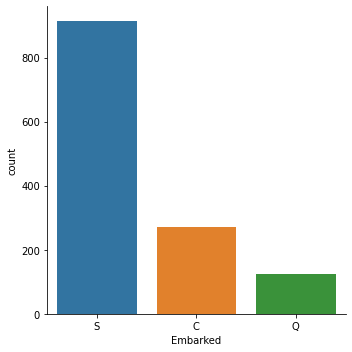

In [16]:
sns.catplot(x='Embarked', kind='count', data=all)

In [17]:
all['Embarked'] = all['Embarked'].fillna('S')
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 165.2+ KB


## Extra Features:

In [18]:
#Age
all.loc[all['Age'] <=16, 'Age'] = 0
all.loc[(all['Age']>16) & (all['Age'] <=32), 'Age'] =1
all.loc[(all['Age']>32)&(all['Age']<=48), 'Age'] = 2
all.loc[(all['Age']>48) & (all['Age']<=64), 'Age'] = 3
all.loc[all['Age'] > 64, 'Age'] = 4

In [23]:
#Title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [25]:
all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [26]:
all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officier.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mile.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()

Mr.          757
Miss.        262
Mrs.         198
Master.       61
Officier.     19
Royal.         6
Col.           4
Mlle.          2
Name: Title, dtype: int64

In [28]:
#Cabin
all['Cabin'] = all['Cabin'].fillna('Missing')
all['Canib'] = all['Cabin'].str[0]
all['Cabin'].value_counts()


Missing            1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: Cabin, Length: 187, dtype: int64

In [29]:
#Family Size & Alone 
all['Family_Size'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['Family_Size']==1, 'IsAlone'] = 1
all.head() 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Canib,Family_Size,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,Missing,S,Mr.,M,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C,Mrs.,C,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,Missing,S,Miss.,M,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,Mrs.,C,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,Missing,S,Mr.,M,1,1


In [30]:
#Drop unwanted variables
all_1 = all.drop(['Name', 'Ticket'], axis=1)
all_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Canib,Family_Size,IsAlone
0,1,0.0,3,male,1.0,1,0,7.2500,Missing,S,Mr.,M,2,0
1,2,1.0,1,female,2.0,1,0,71.2833,C85,C,Mrs.,C,2,0
2,3,1.0,3,female,1.0,0,0,7.9250,Missing,S,Miss.,M,1,1
3,4,1.0,1,female,2.0,1,0,53.1000,C123,S,Mrs.,C,2,0
4,5,0.0,3,male,2.0,0,0,8.0500,Missing,S,Mr.,M,1,1


In [31]:
all_dummies = pd.get_dummies(all_1, drop_first = True)
all_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,IsAlone,Sex_male,...,Title_Officier.,Title_Royal.,Canib_B,Canib_C,Canib_D,Canib_E,Canib_F,Canib_G,Canib_M,Canib_T
0,1,0.0,3,1.0,1,0,7.2500,2,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2,1.0,1,2.0,1,0,71.2833,2,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1.0,3,1.0,0,0,7.9250,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1.0,1,2.0,1,0,53.1000,2,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0.0,3,2.0,0,0,8.0500,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [32]:
all_train = all_dummies[all_dummies['Survived'].notna()]
all_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Columns: 213 entries, PassengerId to Canib_T
dtypes: float64(3), int64(6), uint8(204)
memory usage: 247.1 KB


In [33]:
all_test = all_dummies[all_dummies['Survived'].isna()]
all_test.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Columns: 213 entries, PassengerId to Canib_T
dtypes: float64(3), int64(6), uint8(204)
memory usage: 115.9 KB


## Train/Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_train.drop(['PassengerId','Survived'],axis=1), 
                                                    all_train['Survived'], test_size=0.30, 
                                                    random_state=101, stratify = all_train['Survived'])

## Build AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada=AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=0)
ada.fit(X_train, y_train)



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=0)

In [38]:
predictions = ada.predict(X_test)



## Check Accuracy

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         0.0       0.79      0.84      0.82       165
         1.0       0.72      0.65      0.68       103

    accuracy                           0.77       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



In [40]:
print(f'Train Accuracy - : {ada.score(X_train, y_train):.3f}')
print(f'Test Accuracy - : {ada.score(X_test, y_test):.3f}')


Train Accuracy - : 0.961
Test Accuracy - : 0.769


## Final Prediction

In [41]:
TestForPred = all_test.drop(['PassengerId', 'Survived'], axis=1)
t_pred = ada.predict(TestForPred).astype(int)
PassengerId = all_test['PassengerId']
adaSub = pd.DataFrame({'PassengerId' : PassengerId, 'Survived':t_pred})
adaSub.head()


# adaSub.to_csv("1_Ada_Submission.csv", index = False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
